## Import libraries 

In [73]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for data visualisation, built on matplotlib
from sklearn.linear_model import LogisticRegression # for building classification models
from sklearn.model_selection import train_test_split # for spliting dataset into train and test set
from sklearn.tree import DecisionTreeClassifier # decision tree algorithm
from sklearn.metrics import accuracy_score # to compute model performance
from sklearn.impute import SimpleImputer

## Read the data and  visualise missing values  

In [2]:
df=pd.read_csv("employee_attrition.csv")
df.head()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
0,NaN,6725,0,498.0,0
1,12.0,2782,0,NaN,0
2,9.0,2468,0,NaN,0
3,8.0,5003,0,549.0,0
4,12.0,8578,0,NaN,0


In [54]:
#get shape of the data i.e rows and columns
df.shape

(1470, 5)

In [55]:
# Get sum of missing rows
df.isnull().sum()

TotalWorkingYears    422
MonthlyIncome          0
Overtime               0
DailyRate            576
Label                  0
dtype: int64

**Observations:** There are 422 missing values in the "TotalWorkingYears" column and 576 missing values in the "DailyRate" column 

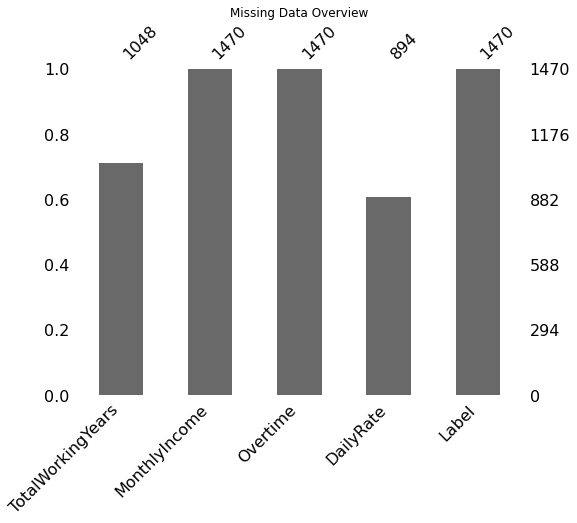

In [13]:

import missingno as msno
import pandas as pd

# Use missingno to visualize missing data
msno.bar(df, figsize=(8, 6))
plt.title('Missing Data Overview')
plt.show()

**Observations:** cdc

## Write a function to build a model 

In [45]:
def build_model(dataset,test_size=0.3,random_state=17):
    #Split the dataset into training and test set
    X_train,X_test,y_train,y_test=train_test_split(dataset.drop("Label",axis=1),dataset["Label"],test_size=test_size,random_state=random_state)
    
    #Fit a decision tree classifier 
    clf=DecisionTreeClassifier(random_state=random_state)
    clf.fit(X_train,y_train)
    
    #Predict and compute accuracy
    y_pred=clf.predict(X_test)
    return accuracy_score(y_test,y_pred).round(3)

In [41]:
## Build a model with the dataset that conatains missing values 
build_model(df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

**Observation:** It is not possibe to build a decision tree model with a dataset that contains missing values 

## Solution to missing values

### 1) Drop rows with missing values 

In [57]:
df_drop_rows=df.dropna()
df_drop_rows.head()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
3,8.0,5003,0,549.0,0
6,13.0,10845,0,566.0,0
7,7.0,5368,1,530.0,0
11,8.0,4678,0,188.0,0
12,2.0,3867,1,193.0,0


In [58]:
df_drop_rows.shape

(639, 5)

In [64]:
build_model(df_drop_rows)

0.755

**Observations:** Dropping the rows with missing values reduced the rows size from 1470 to 639. Droping rows with missing values produced a 75.5% accurate model

### 2) Drop columns with missing values 

In [63]:
df_drop_col=df[["MonthlyIncome","Overtime","Label"]]
df_drop_col.shape

(1470, 3)

In [60]:
df_drop_col.head()

,MonthlyIncome,Overtime,Label
0,6725,0,0
1,2782,0,0
2,2468,0,0
3,5003,0,0
4,8578,0,0


In [61]:
build_model(df_drop_col)

0.773

**Observations:** Droping columns with missing values produced a 77.3% accurate model

### 3) Filling missing values with 0,-1, or other "indicator" values

In [68]:
df_sentinel=df.fillna(value=-1) #used -1 because the dataset contains non negative values, -1 is good indicator of missing values

In [69]:
df_sentinel.head()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
0,-1.0,6725,0,498.0,0
1,12.0,2782,0,-1.0,0
2,9.0,2468,0,-1.0,0
3,8.0,5003,0,549.0,0
4,12.0,8578,0,-1.0,0


In [70]:
build_model(df_sentinel)

0.753

**Observations:** This method produced lower accuracy(75.3%) than the previous methods, this shows the danger of  filling missing values naively 

### 4) Impute the values with mean

In [81]:
imp = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imp.fit_transform(df), columns=["TotalWorkingYears", "MonthlyIncome", "Overtime", "DailyRate", "Label"])
df_imputed.shape

(1470, 5)

In [83]:
df_imputed.head()

,TotalWorkingYears,MonthlyIncome,Overtime,DailyRate,Label
0,11.135496,6725.0,0.0,498.000000,0.0
1,12.000000,2782.0,0.0,804.225951,0.0
2,9.000000,2468.0,0.0,804.225951,0.0
3,8.000000,5003.0,0.0,549.000000,0.0
4,12.000000,8578.0,0.0,804.225951,0.0


In [84]:
build_model(df_imputed)

0.794

**Observations:** The impute method produced the best model, this is the best method. 